In [149]:
!pip install webdriver-manager selenium

In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.action_chains import ActionChains

import time
import random
import re
import glob

import pandas as pd
import numpy as np

cdm = ChromeDriverManager().install()
s=Service(cdm)





====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST chromedriver version for 94.0.4606 google-chrome
Driver [/home/staeiou/.wdm/drivers/chromedriver/linux64/94.0.4606.61/chromedriver] found in cache


In [32]:
def simulate_typing(text,element,delay=.1,driver=None):
    element.send_keys(" ") # not sure why first character doesn't get sent
    count=0
    for letter in text:
        element.send_keys(letter)
        time.sleep(delay*random.uniform(.75, 1.25))
        if driver:
            driver.save_screenshot('screenshot-temp/suggestion-' + str(count).zfill(2) + '.png')
        count += 1
    
    if driver:
        frames = []
        imgs = glob.glob("screenshot-temp/*.png")
        imgs.sort()
        for i in imgs:
            new_frame = Image.open(i)
            frames.append(new_frame)

        # Save into a GIF file that loops forever
        frames[0].save('typing.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [133]:
def send_search(driver,query,delay=.1):
    driver.get('https://www.google.com')
    search_bar = driver.find_element(By.NAME, 'q')
    simulate_typing(query,search_bar,delay)
    search_bar.send_keys(Keys.ENTER)
    
    time.sleep(1)
    
    return [m.start() for m in re.finditer('<span class=\".{5,20}\">Ad.*?<span', driver.page_source)]

In [134]:
queries_text = """pizza
hotels
best smartphone
best laptop
1917
2020
Actors
Adele
Among Us
Anderson Cooper baby
Antebellum
Asymptomatic
Athletes
August Alsina
Babies
Baby Nut
Baby platypus
Beauty how tos"""

In [135]:
sweeney_names = pd.read_csv("https://raw.githubusercontent.com/staeiou/DSC290_F21/main/sweeney_names.csv")


In [138]:
!mkdir screenshots

In [147]:
def save_screenshot(driver: webdriver.Chrome, path: str = '/tmp/screenshot.png') -> None:
    # Ref: https://stackoverflow.com/a/52572919/
    original_size = driver.get_window_size()
    required_width = driver.execute_script('return document.body.parentNode.scrollWidth')
    required_height = driver.execute_script('return document.body.parentNode.scrollHeight')
    driver.set_window_size(required_width, required_height)
    driver.save_screenshot(path)  # has scrollbar
    #driver.find_element_by_tag_name('body').screenshot(path)  # avoids scrollbar
    driver.set_window_size(original_size['width'], original_size['height'])

In [148]:
results = []
for query in queries_text.split("\n"):
    driver = webdriver.Chrome(service=s)
    time.sleep(2)
    result = send_search(driver,query)
    ss_filename = "screenshots/" + query + ".png"
    
    save_screenshot(driver,ss_filename)
    
    results.append({'query':query,'ads':result,'screenshot':ss_filename,'html':driver.page_source})
    
    driver.close()
    time.sleep(2)

KeyboardInterrupt: 

In [143]:
pd.DataFrame(results)

,query,ads,screenshot,html
0,pizza,[195206],screenshots/pizza.png,"<html itemscope="""" itemtype=""http://schema.org..."
1,hotels,"[114733, 121814, 128869, 135821]",screenshots/hotels.png,"<html itemscope="""" itemtype=""http://schema.org..."
2,best smartphone,[122293],screenshots/best smartphone.png,"<html itemscope="""" itemtype=""http://schema.org..."
3,best laptop,"[115670, 122821, 128788, 134229, 433166, 433365]",screenshots/best laptop.png,"<html itemscope="""" itemtype=""http://schema.org..."


In [82]:
driver = webdriver.Chrome(service=s)
result = send_search(driver,"pizza")



'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>pizza - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.hvE_rrhCzPE.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-98F2Gk-siNaIBZOtcWfXQWKdTpQ/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){\nvar b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'vuOCYajVHM6JggfQ0K_QDA\',kEXPI:\'31\',kBL:\'A88h\'};google.sn=\'
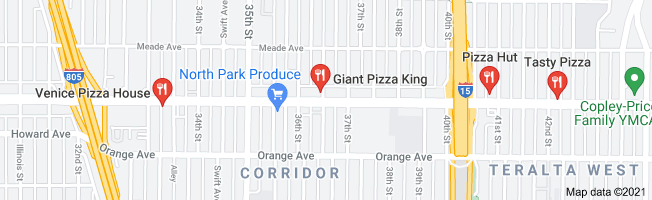
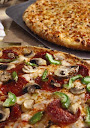
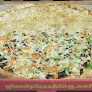
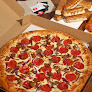
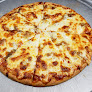
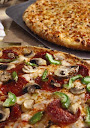
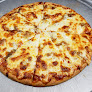
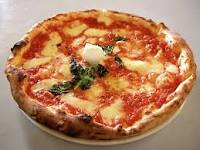
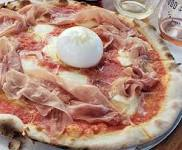
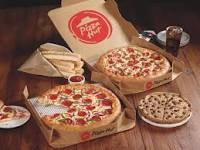
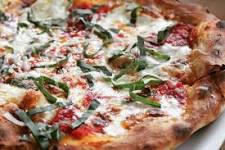
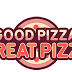
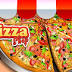
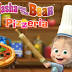
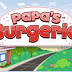
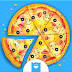
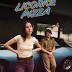
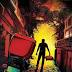
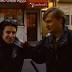
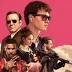
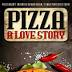
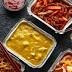
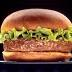
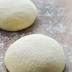
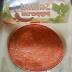
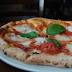
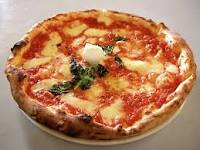
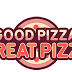
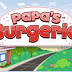
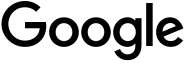

In [123]:
driver.page_source

In [119]:
re.match(".*>Ad<","ljkasdlksajdlksajdlksadlkjadlkj>Ad<321213")

<re.Match object; span=(0, 35), match='ljkasdlksajdlksajdlksadlkjadlkj>Ad<'>

In [125]:
re.match("<span class=\".{5,20}\">Ad<span",driver.page_source)

In [114]:
re.match(r"<span\s*.*>Ad.*?</", driver.page_source)


In [96]:
pattern = "/<span.*>Ad<\/span>/gm"
re.match(pattern,driver.page_source)

In [38]:
">Ad<" in driver.page_source

True

In [42]:
driver.page_source.find('>Ad<span style="padding:0 5px">·')

113887

In [41]:
driver.page_source[113857:113987]

'an class="jpu5Q VqFMTc p8AiDd">Ad<span style="padding:0 5px">·</span></span><span class="Zu0yb LWAWHf OSrXXb qzEoUe">https://www.i'

In [132]:
[m.start() for m in re.finditer('<span class=\".{5,20}\">Ad<span', driver.page_source)]

MaxRetryError: HTTPConnectionPool(host='localhost', port=49221): Max retries exceeded with url: /session/55c5b04714fc4351bf1b1c38579c6a7c/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f4b722d4e80>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [127]:
driver.page_source[189080:189180]

'><div><span class="VqFMTc p8AiDd">Ad<span style="padding:0 5px">·</span></span><span class="MvDXgc">'